In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
origin = []
with open('mouth.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        origin.append(row)
        data = [int(d) for d in row[1:]]
        n = int(len(data)/2)
        x.append(data[:n])
        y.append(data[n:])
num = len(x)
print("data num:",num)        

data num: 14187


In [2]:
from math import atan2, degrees
def cal_angle(x, y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    d1 = degrees(atan2(dy,dx))
    dx = x[1]-x[2]
    dy = y[1]-y[2]
    d2 = degrees(atan2(dy,dx))
    return d1+d2

In [66]:
labels = []
dxs = []
tops = []
bottoms = []
thick = 0
medium = 0
small = 0
for i in range(num):
    rx = x[i]
    ry = y[i]
    top = ry[14]-ry[3]
    bottom = ry[9]-ry[18]
    total = top + bottom
    dx = max(rx)-min(rx)
    dxs.append(dx)
    tops.append(top)
    bottoms.append(bottom)
    if dx < 150:
        labels.append("small")    
        small += 1
    elif top > 10 and bottom > 30:
        labels.append("thick")
        thick +=1
    else:
        labels.append("medium")
        medium += 1
        

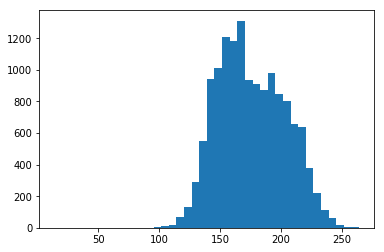

In [62]:
plt.hist(dxs, bins=40)
plt.show()

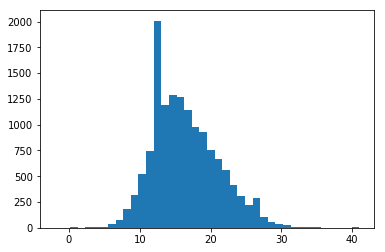

In [38]:
plt.hist(tops, bins=40)
plt.show()

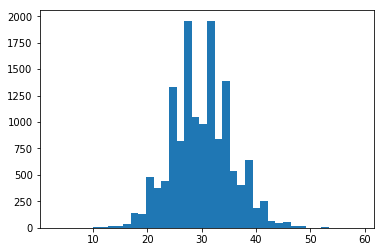

In [39]:
plt.hist(bottoms, bins=40)
plt.show()

In [67]:
print(thick)
print(medium)
print(small)

4896
6576
2715


Text(0,0.5,'bottoms')

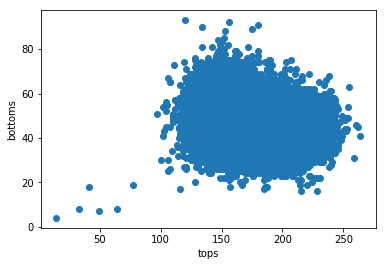

In [46]:
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(dxs,dys)
plt.xlabel('tops')
plt.ylabel('bottoms')

In [68]:
labels = np.asarray(labels).reshape((num,1))
origin = np.asarray(origin).reshape((num,2*n+1))
output = np.hstack((origin,labels))

In [70]:
with open('mouth_labels.csv','w',encoding='utf8',newline='') as file:
    wr = csv.writer(file) #, quoting=csv.QUOTE_ALL)
    wr.writerows(output)